# Individual Plots of Interest

In [1]:
import numpy as np
import pandas as pd
from utils import (
    establish_s3_connection,
)
from plotting_utils import (
    plot_forecast, 
)
from s3_utils import (
    download_df_from_s3
)
import warnings

warnings.filterwarnings("ignore")
targets = pd.read_csv('aquatics-targets.csv.gz')
s3_client = establish_s3_connection()
s3_dict = {'client': s3_client, 'bucket': 'shared-neon4cast-darts'}
# Lists and dictionaries to store dataframes and 
best_performers_dfs = {}
best_models_listform = {}
target_variables = ['oxygen', 'temperature', 'chla']
model_names = [
    "BlockRNN", "Transformer", "NBEATS", 
    "TCN", "RNN", "TFT", "AutoTheta",
    "NLinear", "DLinear", "NaiveEnsemble",
]

# Read csv's and store into best_performers_df
for target_variable in target_variables:
    best_performers_dfs[target_variable] = {}
    for pos in ['inter', 'intra']:
        # Allowing ability to use remote or local
        if s3_client:
            best_performers_dfs[target_variable][pos] = download_df_from_s3(
                f'dataframes/{target_variable}_{pos}_all.csv', 
                s3_dict=s3_dict,
            )
        else:
            best_performers_dfs[target_variable][pos] = pd.read_csv(
                f'dataframes/{target_variable}_{pos}_all.csv'
            )
        if pos == 'inter':
            df = best_performers_dfs[target_variable][pos]
            best_models_listform[target_variable] = [
                [model, int(df[df['model'] == model]['model_id'].unique())] for model in model_names
            ]

/home/rstudio/.virtualenv/neon4cast-darts-ml/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/home/rstudio/.virtualenv/neon4cast-darts-ml/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),



 Using https://minio.carlboettiger.info for data storage and access.


In [2]:
best_models_listform['oxygen']

[['BlockRNN', 3],
 ['Transformer', 1],
 ['NBEATS', 1],
 ['TCN', 0],
 ['RNN', 2],
 ['TFT', 1],
 ['AutoTheta', 0],
 ['NLinear', 0],
 ['DLinear', 0],
 ['NaiveEnsemble', 0]]

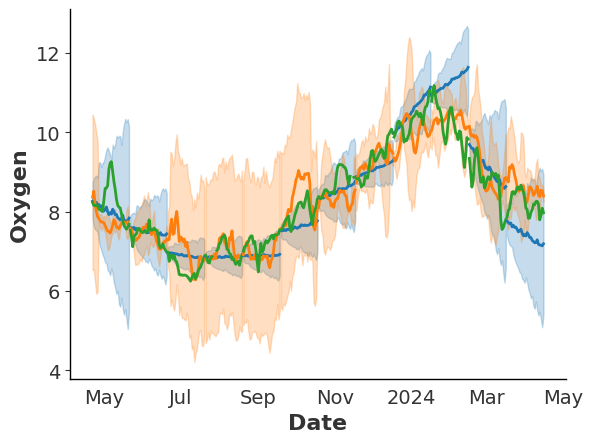

In [3]:
site_id = 'FLNT'
model = 'AutoTheta'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_theta'
        
    )

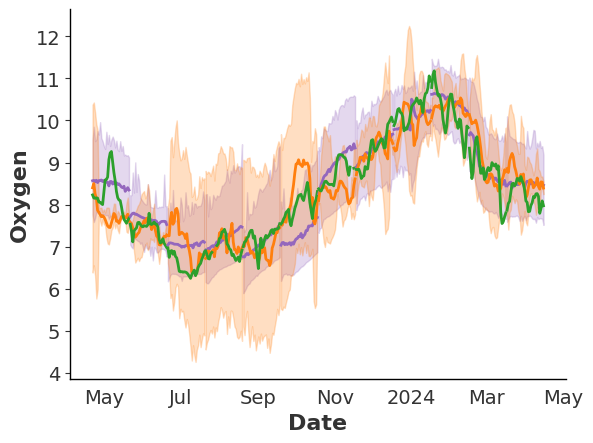

In [4]:
site_id = 'FLNT'
model = 'TFT'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_tft'
    )

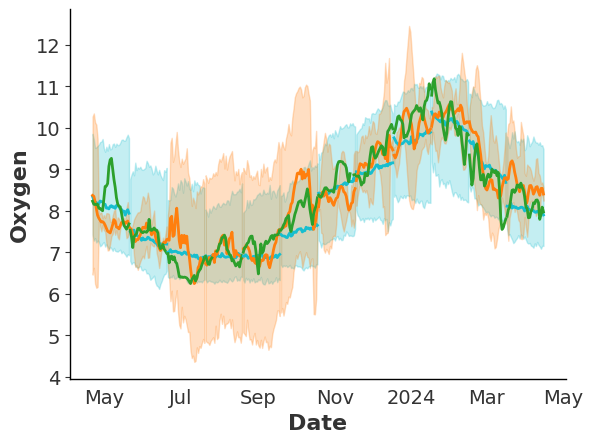

In [5]:
site_id = 'FLNT'
model = 'NaiveEnsemble'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_ensemble'
    )

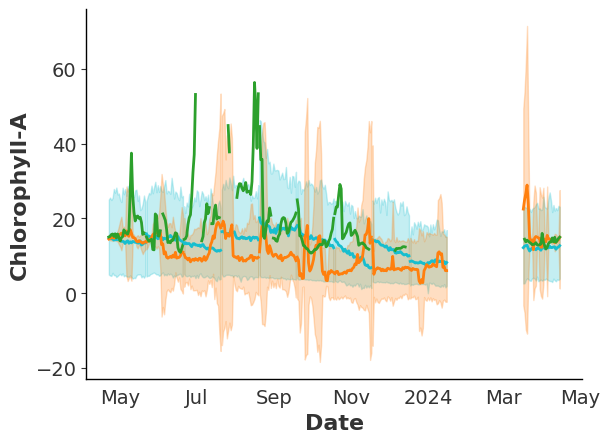

In [6]:
site_id = 'SUGG'
model = 'NaiveEnsemble'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_ensemble'
        )
    except:
        pass

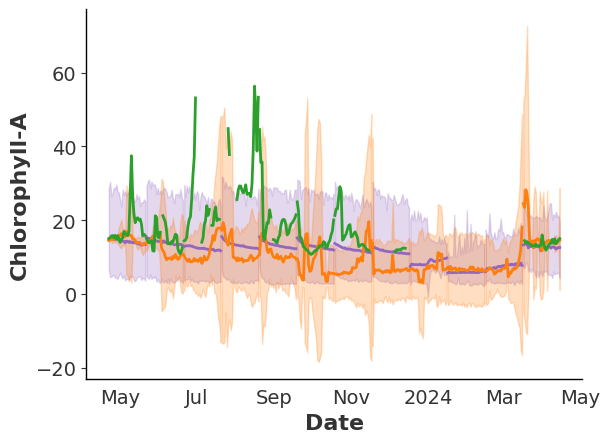

In [7]:
site_id = 'SUGG'
model = 'TFT'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_tft'
        )
    except:
        pass

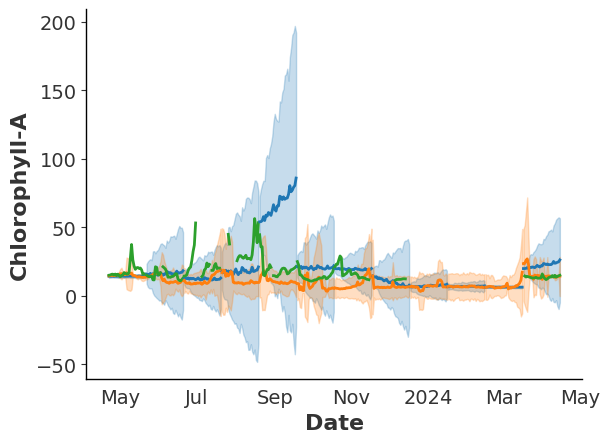

In [8]:
site_id = 'SUGG'
model = 'AutoTheta'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_theta'
        )
    except:
        pass

In [9]:
best_models_listform['oxygen']

[['BlockRNN', 3],
 ['Transformer', 1],
 ['NBEATS', 1],
 ['TCN', 0],
 ['RNN', 2],
 ['TFT', 1],
 ['AutoTheta', 0],
 ['NLinear', 0],
 ['DLinear', 0],
 ['NaiveEnsemble', 0]]

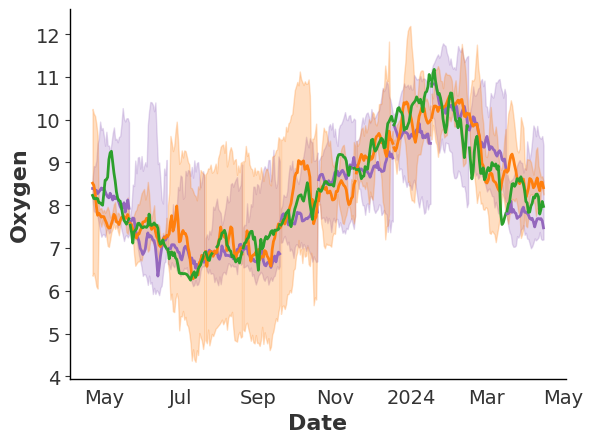

In [18]:
site_id = 'FLNT'
model = 'DLinear'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

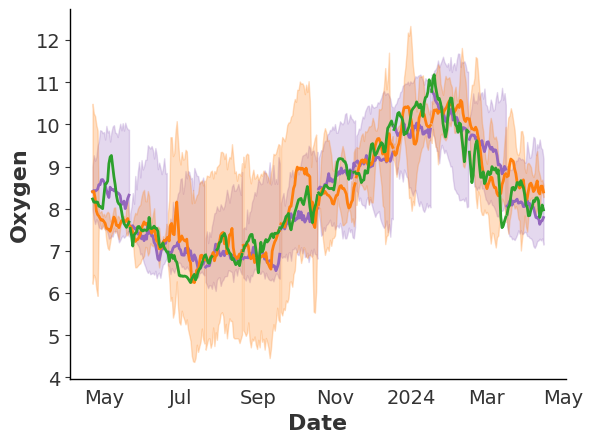

In [17]:
site_id = 'FLNT'
model = 'NLinear'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

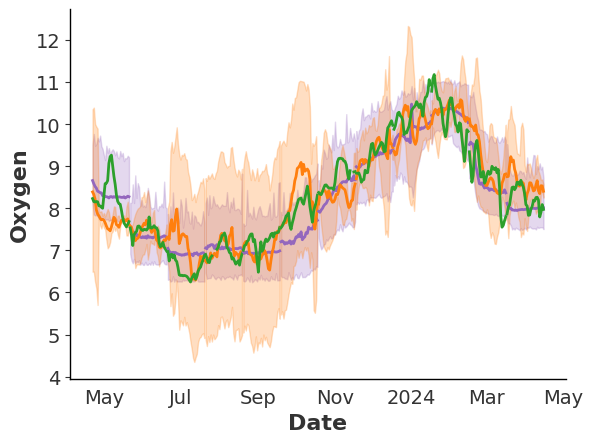

In [16]:
site_id = 'FLNT'
model = 'TFT'
id_list=[1,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

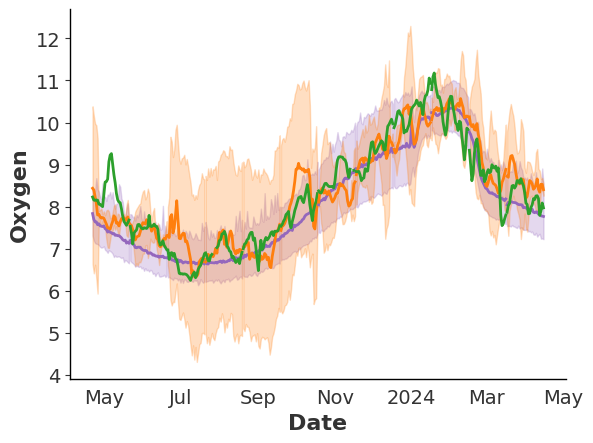

In [15]:
site_id = 'FLNT'
model = 'RNN'
id_list=[2,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

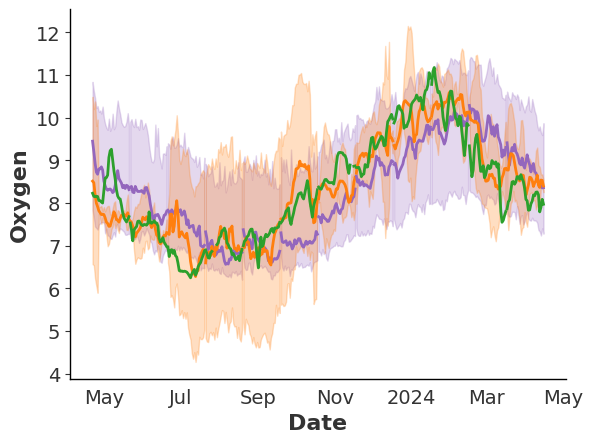

In [13]:
site_id = 'FLNT'
model = 'TCN'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

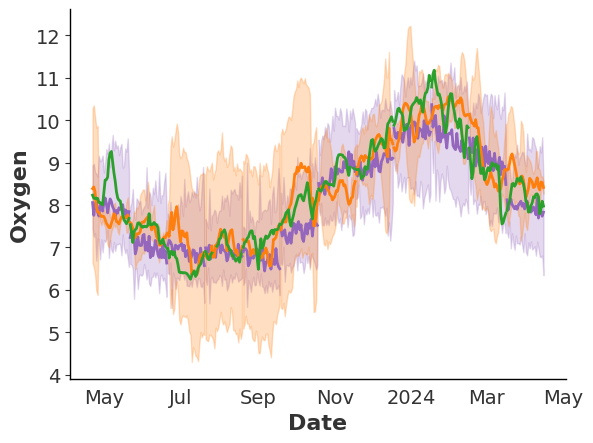

In [12]:
site_id = 'FLNT'
model = 'NBEATS'
id_list=[1,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

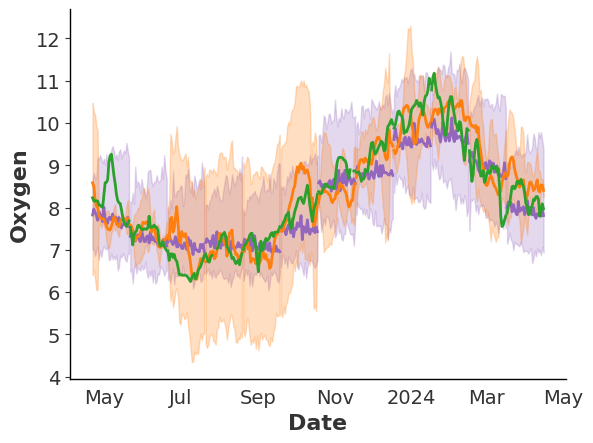

In [11]:
site_id = 'FLNT'
model = 'Transformer'
id_list=[1,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
        )
    except:
        pass

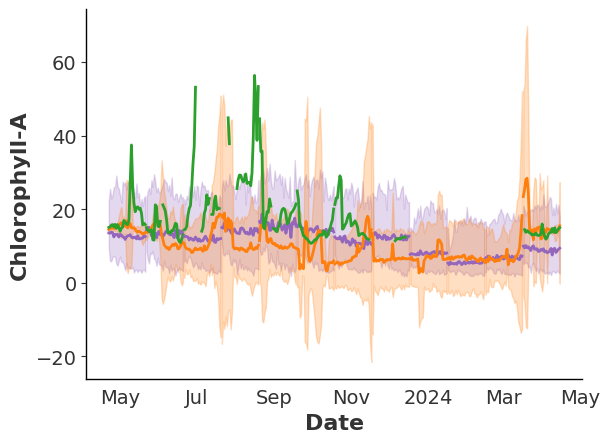

In [10]:
site_id = 'SUGG'
model = 'BlockRNN'
id_list=[3,]
target_variable = 'chla'

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='chla_blockrnn'
    )

In [19]:
dfs = {}
for target_variable in target_variables:
    dfs[target_variable] = download_df_from_s3(f'dataframes/{target_variable}_means.csv', s3_dict)

In [20]:
dfs['oxygen']

,model,value_forecast_crps,value_historical_crps,value_forecast_rmse,value_historical_rmse,value_naive
0,AutoTheta,0.673597,0.618216,1.015141,0.923544,1.547182
1,BlockRNN,0.515680,0.617845,0.800299,0.923596,1.547182
2,DLinear,0.522808,0.617862,0.807105,0.924822,1.547182
3,NBEATS,0.512480,0.616520,0.795900,0.921533,1.547182
4,NLinear,0.524518,0.617130,0.802367,0.923155,1.547182
5,NaiveEnsemble,0.471607,0.617112,0.739549,0.922341,1.547182
6,RNN,0.600273,0.617447,0.922997,0.922156,1.547182
7,TCN,0.622726,0.617242,0.978484,0.922548,1.547182
8,TFT,0.519864,0.617736,0.797192,0.923324,1.547182
9,Transformer,0.512430,0.617327,0.799418,0.923183,1.547182


In [21]:
dfs['temperature']

,model,value_forecast_crps,value_historical_crps,value_forecast_rmse,value_historical_rmse,value_naive
0,AutoTheta,1.553605,1.457440,2.348237,2.187639,6.048925
1,BlockRNN,1.447329,1.455499,2.257501,2.183135,6.048925
2,DLinear,1.351142,1.456299,2.078893,2.186871,6.048925
3,NBEATS,1.362579,1.455743,2.103486,2.187510,6.048925
4,NLinear,1.331161,1.457702,2.056993,2.190679,6.048925
5,NaiveEnsemble,1.177110,1.456056,1.800515,2.185947,6.048925
6,RNN,1.318977,1.456380,2.030734,2.186733,6.048925
7,TCN,1.889642,1.455766,3.021978,2.186744,6.048925
8,TFT,1.191955,1.456311,1.856050,2.186350,6.048925
9,Transformer,1.322729,1.456309,2.054115,2.189356,6.048925


In [22]:
dfs['chla']

,model,value_forecast_crps,value_historical_crps,value_forecast_rmse,value_historical_rmse,value_naive
0,AutoTheta,4.200334,4.829656,6.316792,7.472826,4.862748
1,BlockRNN,3.142568,4.833987,5.158788,7.481195,4.862748
2,DLinear,3.467693,4.822360,5.482200,7.446094,4.862748
3,NBEATS,3.782194,4.830668,5.953102,7.464219,4.862748
4,NLinear,3.669508,4.830252,5.628094,7.458743,4.862748
5,NaiveEnsemble,3.442606,4.831941,5.499187,7.467461,4.862748
6,RNN,4.153635,4.836777,6.399177,7.474002,4.862748
7,TCN,3.723129,4.829182,5.769288,7.429836,4.862748
8,TFT,3.673806,4.817894,5.872663,7.445165,4.862748
9,Transformer,4.023111,4.835644,6.352367,7.473982,4.862748
